In [55]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [56]:
df_Transaction=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",header=1, sheet_name="Transactions")

In [57]:
df_Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [58]:
df_Transaction = df_Transaction.replace(r'^\s*$', np.nan, regex=True)

In [59]:
df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

# 1. Data Cleaning on Transaction Dataset

## 1.1 Handling missing data

In [60]:
# df_Transaction[df_Transaction["online_order"].isnull()]

In [61]:
df_Transaction[df_Transaction["brand"].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


#### We observed that rows with missing values in the 'brand' column also lack values in the 'product_line', 'product_class', 'product_size', 'standard_cost', and 'product_first_sold_date' columns. So we decide to drop these 197 rows for the sake of less useful information.


In [62]:
df_Transaction.dropna(subset=["brand"],axis=0,inplace=True)

In [63]:
df_Transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [64]:
df_Transaction["online_order"]=df_Transaction["online_order"].fillna("99")

In [65]:
df_Transaction["online_order"]=df_Transaction["online_order"].astype(int)

In [66]:
df_Transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

## 1.2. check for duplicated rows

In [67]:
df_Transaction[df_Transaction.duplicated()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


## 1.3 some basic EDA for transcation dataset

In [68]:
##3. check numerical data and categorical data
numeric_features=["transaction_date","list_price","standard_cost","product_first_sold_date"]
categorical_featurs_tran=[feature for feature in df_Transaction.columns if df_Transaction[feature].dtype=="O"]
categorical_featurs_tran

['order_status', 'brand', 'product_line', 'product_class', 'product_size']

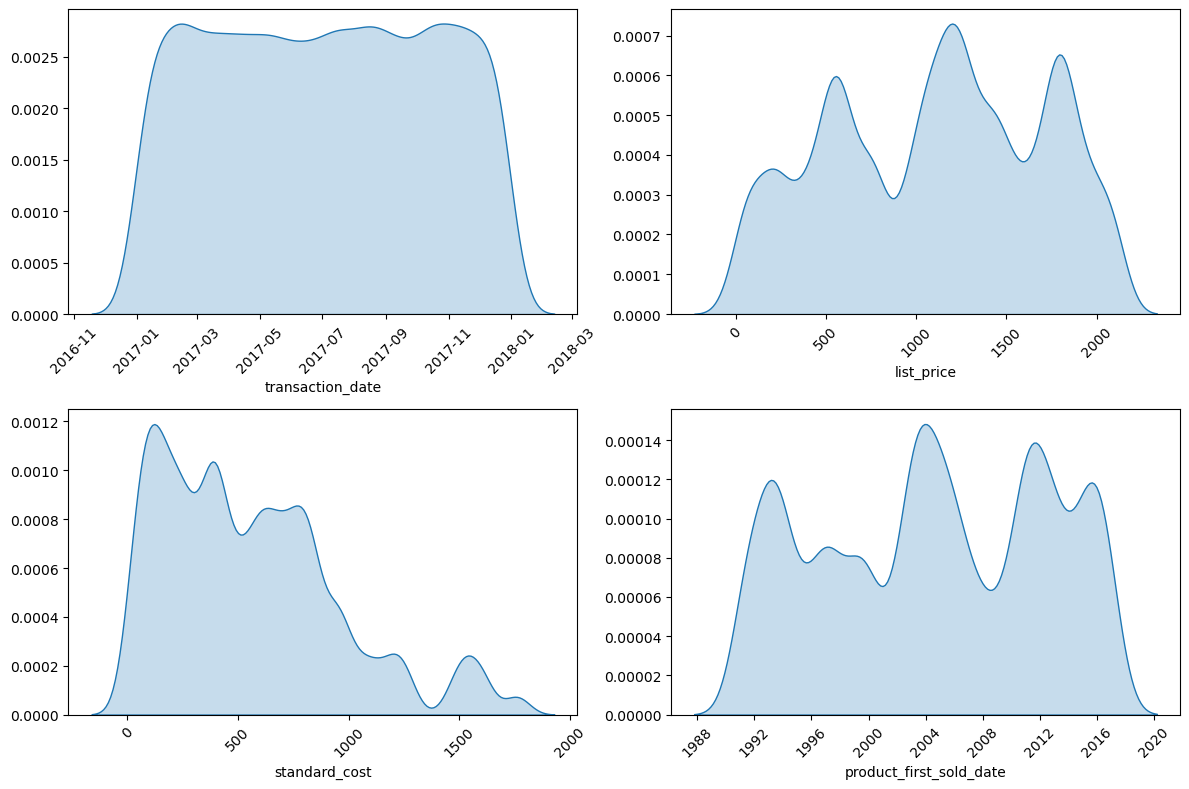

In [69]:
plt.figure(figsize=(12,8))

for i, feature in enumerate(numeric_features):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df_Transaction[feature],fill=True)
    plt.xlabel(feature)
    plt.ylabel("")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
plt.show()


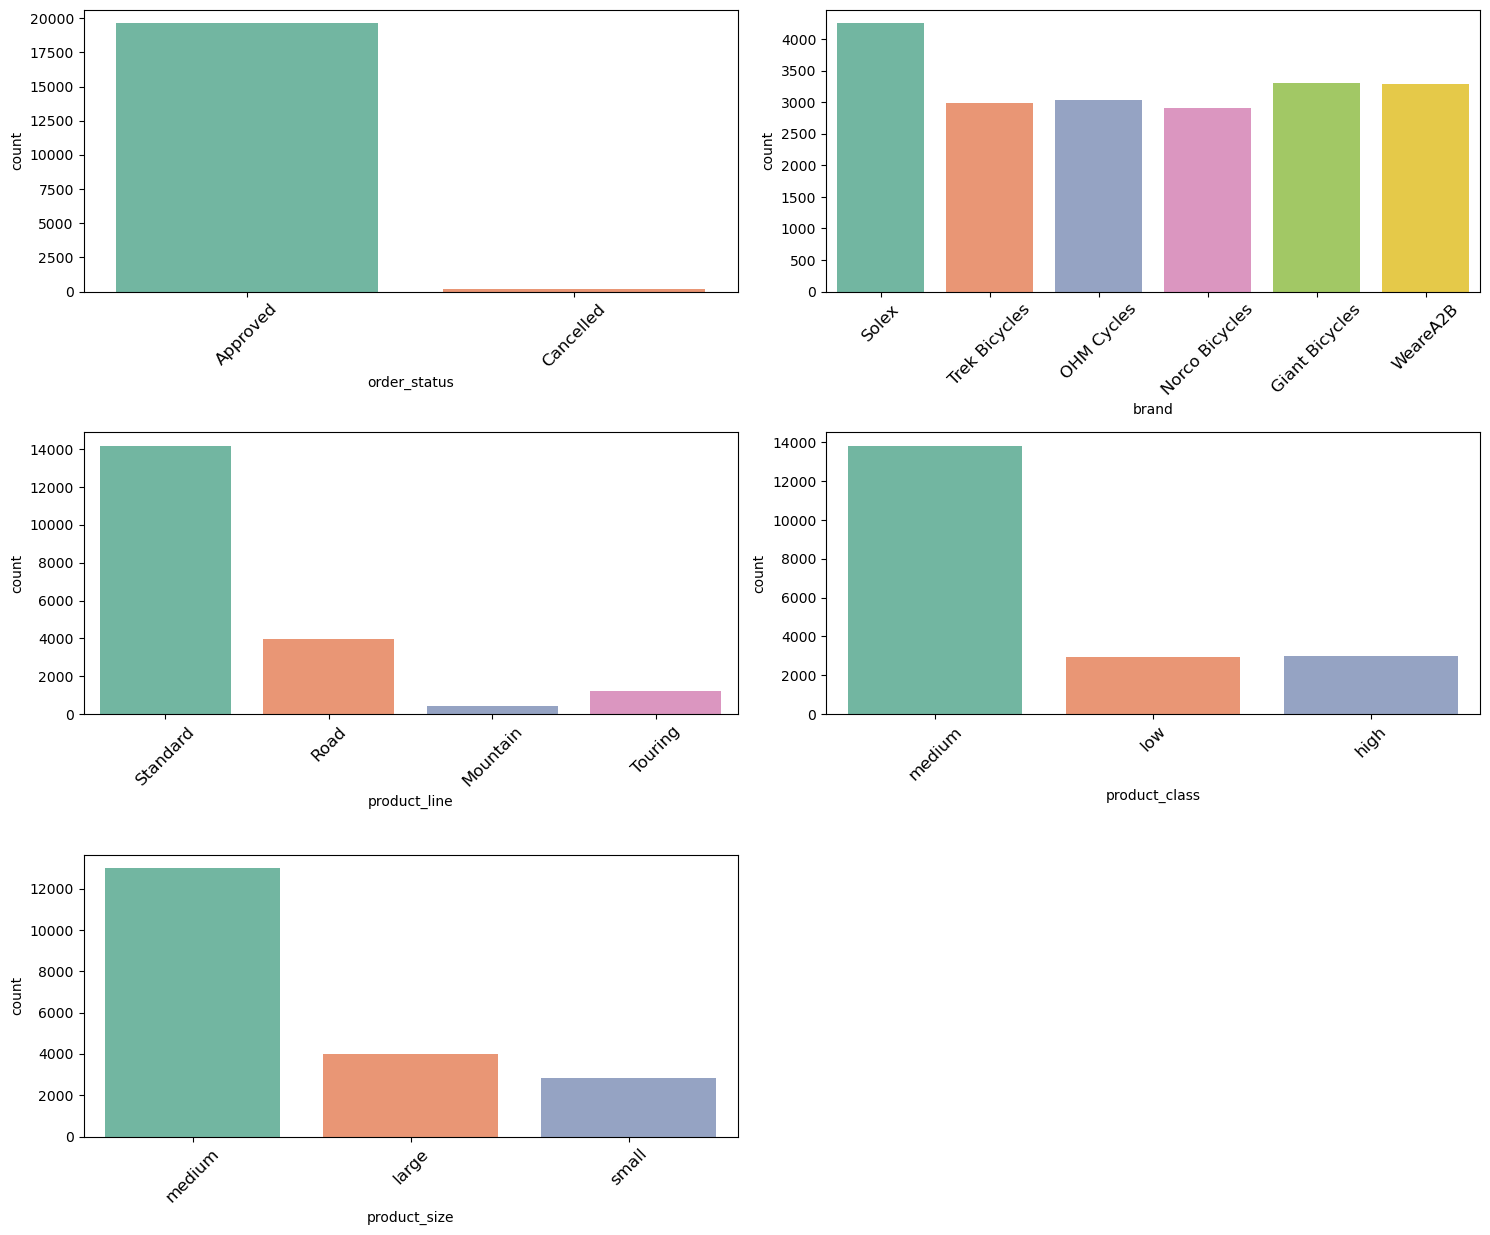

In [70]:
plt.figure(figsize=(15,12))
for i, feature in enumerate(categorical_featurs_tran):
    plt.subplot(3,2, i+1)
    sns.countplot(x=df_Transaction[feature], palette="Set2")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.xticks(rotation=45,fontsize=12)
   
plt.show()

# 2.cohort analysis

#### First,we need to get cohort month. cohort month is the month in which a customer first made a purchase or first engaged with a company.

In [71]:
import datetime as dt
def getmonth(x):
    return dt.datetime(x.year, x.month,1)

In [72]:
df_Transaction["transact_month"]=df_Transaction["transaction_date"].apply(getmonth)

In [73]:
# df_Transaction.head()

In [74]:
df_Transaction["cohort_month"]=df_Transaction.groupby("customer_id")["transact_month"].transform("min")

In [75]:
df_Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transact_month,cohort_month
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,2017-10-01,2017-01-01


#### Second, we need to get the cohort index.Cohort Index measures the number of time units (typically months) that have elapsed since the Cohort Month.

In [76]:
def get_cohort_index(df):
    transact_year = df['transact_month'].year
    cohort_year = df['cohort_month'].year
    transact_month = df['transact_month'].month
    cohort_month = df['cohort_month'].month
    cohort_index = (transact_year - cohort_year) * 12 + (transact_month - cohort_month) + 1
    return cohort_index


In [77]:
df_Transaction['cohort_index'] = df_Transaction.apply(get_cohort_index, axis=1)

In [78]:
df_Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transact_month,cohort_month,cohort_index
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,2017-10-01,2017-01-01,10


#### Then, we need to create a pivot table with cohort month as rows, and cohort index as columns

In [79]:
df_Transaction_cohort_pivot=df_Transaction.pivot_table(values="customer_id", index="cohort_month", columns="cohort_index",aggfunc=pd.Series.nunique)

In [80]:
df_Transaction_cohort_pivot

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01-01,1341.0,481.0,496.0,496.0,490.0,476.0,506.0,521.0,491.0,518.0,491.0,506.0
2017-02-01,802.0,321.0,297.0,314.0,287.0,298.0,308.0,281.0,329.0,302.0,294.0,NaN
2017-03-01,483.0,167.0,172.0,164.0,182.0,180.0,168.0,208.0,189.0,184.0,NaN,NaN
2017-04-01,342.0,113.0,122.0,157.0,146.0,122.0,143.0,127.0,133.0,NaN,NaN,NaN
2017-05-01,211.0,85.0,79.0,86.0,73.0,73.0,74.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,124.0,45.0,46.0,49.0,47.0,46.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,78.0,27.0,28.0,33.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,18.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_Transaction_cohort_pivot_prc=df_Transaction_cohort_pivot.divide(df_Transaction_cohort_pivot.iloc[:,0],axis=0)

In [82]:
df_Transaction_cohort_pivot_prc

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01-01,1.0,0.358688,0.369873,0.369873,0.365399,0.354959,0.377330,0.388516,0.366145,0.386279,0.366145,0.37733
2017-02-01,1.0,0.400249,0.370324,0.391521,0.357855,0.371571,0.384040,0.350374,0.410224,0.376559,0.366584,NaN
2017-03-01,1.0,0.345756,0.356108,0.339545,0.376812,0.372671,0.347826,0.430642,0.391304,0.380952,NaN,NaN
2017-04-01,1.0,0.330409,0.356725,0.459064,0.426901,0.356725,0.418129,0.371345,0.388889,NaN,NaN,NaN
2017-05-01,1.0,0.402844,0.374408,0.407583,0.345972,0.345972,0.350711,0.383886,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.362903,0.370968,0.395161,0.379032,0.370968,0.419355,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.346154,0.358974,0.423077,0.474359,0.307692,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.352941,0.411765,0.333333,0.254902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.304348,0.304348,0.391304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_Transaction_cohort_pivot_prc.index=df_Transaction_cohort_pivot_prc.index.strftime("%b %Y").str.upper()

In [84]:
df_Transaction_cohort_pivot_prc

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
JAN 2017,1.0,0.358688,0.369873,0.369873,0.365399,0.354959,0.377330,0.388516,0.366145,0.386279,0.366145,0.37733
FEB 2017,1.0,0.400249,0.370324,0.391521,0.357855,0.371571,0.384040,0.350374,0.410224,0.376559,0.366584,NaN
MAR 2017,1.0,0.345756,0.356108,0.339545,0.376812,0.372671,0.347826,0.430642,0.391304,0.380952,NaN,NaN
APR 2017,1.0,0.330409,0.356725,0.459064,0.426901,0.356725,0.418129,0.371345,0.388889,NaN,NaN,NaN
MAY 2017,1.0,0.402844,0.374408,0.407583,0.345972,0.345972,0.350711,0.383886,NaN,NaN,NaN,NaN
JUN 2017,1.0,0.362903,0.370968,0.395161,0.379032,0.370968,0.419355,NaN,NaN,NaN,NaN,NaN
JUL 2017,1.0,0.346154,0.358974,0.423077,0.474359,0.307692,NaN,NaN,NaN,NaN,NaN,NaN
AUG 2017,1.0,0.352941,0.411765,0.333333,0.254902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEP 2017,1.0,0.304348,0.304348,0.391304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Next, we create a heatmap to visualize customer retention across different cohorts.This heatmap illustrates how each cohort has retained customers over various time intervals.

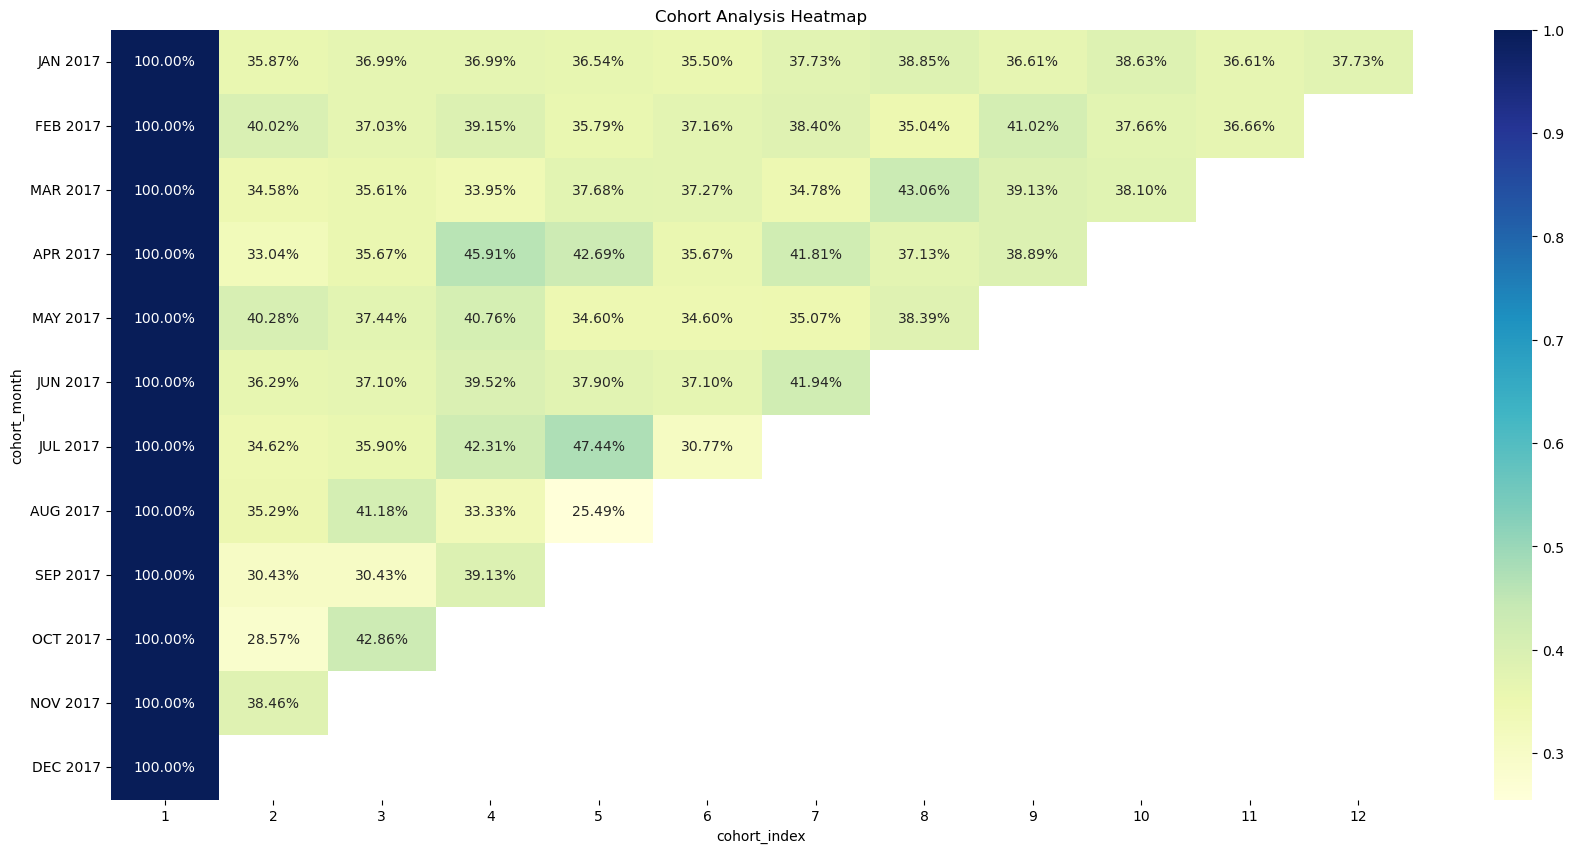

In [89]:
plt.figure(figsize=(21,10))
plt.title('Cohort Analysis Heatmap')
sns.heatmap(df_Transaction_cohort_pivot_prc,annot=True,fmt='.2%',cmap="YlGnBu")
plt.show()

#### From this cohort analysis heatmap, we observe that the cohort acquired in August 2017 exhibits a relatively low retention rate of 25.49% by the fifth cohort index, which corresponds to four months post-acquisition. To understand the potential reasons behind this drop in retention, we want to investigate if there is any brand or product-specific factors that might influence this trend.

#### First, we need to focus on analyzing the data of customers who were acquired in August 2017 and reached the fifth cohort index (i.e., December 2017).

In [112]:
df_Transaction['price_cost_margin']=df_Transaction['list_price'] - df_Transaction['standard_cost']

In [113]:
df_Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transact_month,cohort_month,cohort_index,price_cost_margin
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2017-02-01,2017-02-01,1,17.87
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,2017-05-01,2017-01-01,5,1702.55
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,2017-10-01,2017-01-01,10,1544.61
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,2017-08-01,2017-02-01,7,817.36
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,2017-10-01,2017-01-01,10,1055.82


In [123]:
df_august_cohort=df_Transaction[(df_Transaction["cohort_month"])=="2017-08-01"]
df_august_cohort_fifth_index_transactions=df_august_cohort[(df_august_cohort["cohort_index"]==5)]

In [124]:
df_august_cohort_fourth_index_transactions=df_august_cohort[(df_august_cohort["cohort_index"]==4)]

In [125]:
df_august_cohort_fifth_index_transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transact_month,cohort_month,cohort_index,price_cost_margin
598,599,45,1059,2017-12-08,1,Approved,Trek Bicycles,Road,low,medium,980.37,234.43,2004-08-17,2017-12-01,2017-08-01,5,745.94
1017,1018,43,1910,2017-12-13,0,Approved,Norco Bicycles,Standard,medium,medium,1555.58,818.01,2004-08-07,2017-12-01,2017-08-01,5,737.57
2582,2583,3,851,2017-12-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2010-06-07,2017-12-01,2017-08-01,5,1702.55
5000,5001,28,2703,2017-12-11,0,Approved,Norco Bicycles,Standard,medium,small,1216.14,1082.36,2006-11-10,2017-12-01,2017-08-01,5,133.78
5219,5220,58,1630,2017-12-07,1,Approved,OHM Cycles,Standard,medium,medium,912.52,141.40,2015-10-18,2017-12-01,2017-08-01,5,771.12
5542,5543,31,849,2017-12-03,1,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,2006-11-10,2017-12-01,2017-08-01,5,57.73
11465,11466,59,2330,2017-12-26,0,Approved,Solex,Standard,medium,large,1061.56,733.58,1993-07-20,2017-12-01,2017-08-01,5,327.98
13112,13113,10,1008,2017-12-13,0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,2014-03-03,2017-12-01,2017-08-01,5,1103.43
13898,13899,29,2408,2017-12-06,0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,2016-11-22,2017-12-01,2017-08-01,5,135.85
15394,15395,8,2300,2017-12-13,1,Approved,Solex,Road,medium,small,1703.52,1516.13,2005-12-07,2017-12-01,2017-08-01,5,187.39


#### We aim to analyze how product brands influence customer retention by examining purchasing behaviors within these cohorts. Notably, the number of customers who purchased "Solex" products decreased from ten in the fourth month to four in the fifth month, mainly in the 'Standard' product line. Similarly, customers who bought "Giant Bicycles" dropped from six in the fourth month to just one in the fifth month. These observations suggest retention challenges that may be linked to specific product lines or brand experiences

In [133]:
df_august_cohort_fourth_index_transactions.groupby(["brand","product_line"]).agg({
    "customer_id": pd.Series.nunique
}).rename(columns={"customer_id":"unique_customers"}).sort_values("brand")

unique_customers
brand          product_line                  
Giant Bicycles Standard                     5
               Touring                      1
Norco Bicycles Road                         2
               Standard                     1
OHM Cycles     Standard                     3
Solex          Road                         1
               Standard                     9
Trek Bicycles  Standard                     1
WeareA2B       Road                         1
               Standard                     1
               Touring                      1

In [134]:
df_august_cohort_fifth_index_transactions.groupby(["brand","product_line"]).agg({
    "customer_id": pd.Series.nunique
}).rename(columns={"customer_id":"unique_customers"}).sort_values("brand")

unique_customers
brand          product_line                  
Giant Bicycles Standard                     1
Norco Bicycles Road                         1
               Standard                     2
OHM Cycles     Road                         1
               Standard                     1
Solex          Road                         2
               Standard                     2
Trek Bicycles  Road                         1
               Standard                     1
WeareA2B       Touring                      1

## 3. RFM Analysis

In [277]:
# Assume the " Current date" for analysis is the day after the last transaction date in this dataset
# Calculate the RFM score.
# Rencency: Calculate the most recent purchase date for each customer
# Frequency: Calculate the count of transactions per customer.
# Monetary: Calculate the total purchase amount for each customer based on "list_price" column

In [420]:
current_date=df_Transaction["transaction_date"].max()+dt.timedelta(days=1)
rfm=df_Transaction.groupby("customer_id").agg({
    "transaction_date": lambda x: (current_date-x.max()).days,
    "customer_id":"count",
    "list_price":"sum"
}).rename(columns={
    'transaction_date': 'Recency',
    'customer_id': 'Frequency',
    'list_price': 'Monetary'
})

# Assign RFM labels
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, ['4', '3', '2', '1'], duplicates='drop').astype(str)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, ['1', '2', '3', '4'], duplicates='drop').astype(str)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, ['1', '2', '3', '4'], duplicates='drop').astype(str)

# Combine into a single score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

In [422]:
rfm=rfm.reset_index()

In [423]:
rfm_summary=rfm["RFM_Score"].value_counts().reset_index(name="Frequency").sort_values("Frequency",ascending=False)

In [424]:
rfm_summary.head()

,RFM_Score,Frequency
0,111,335
1,444,210
2,344,195
3,211,173
4,223,132


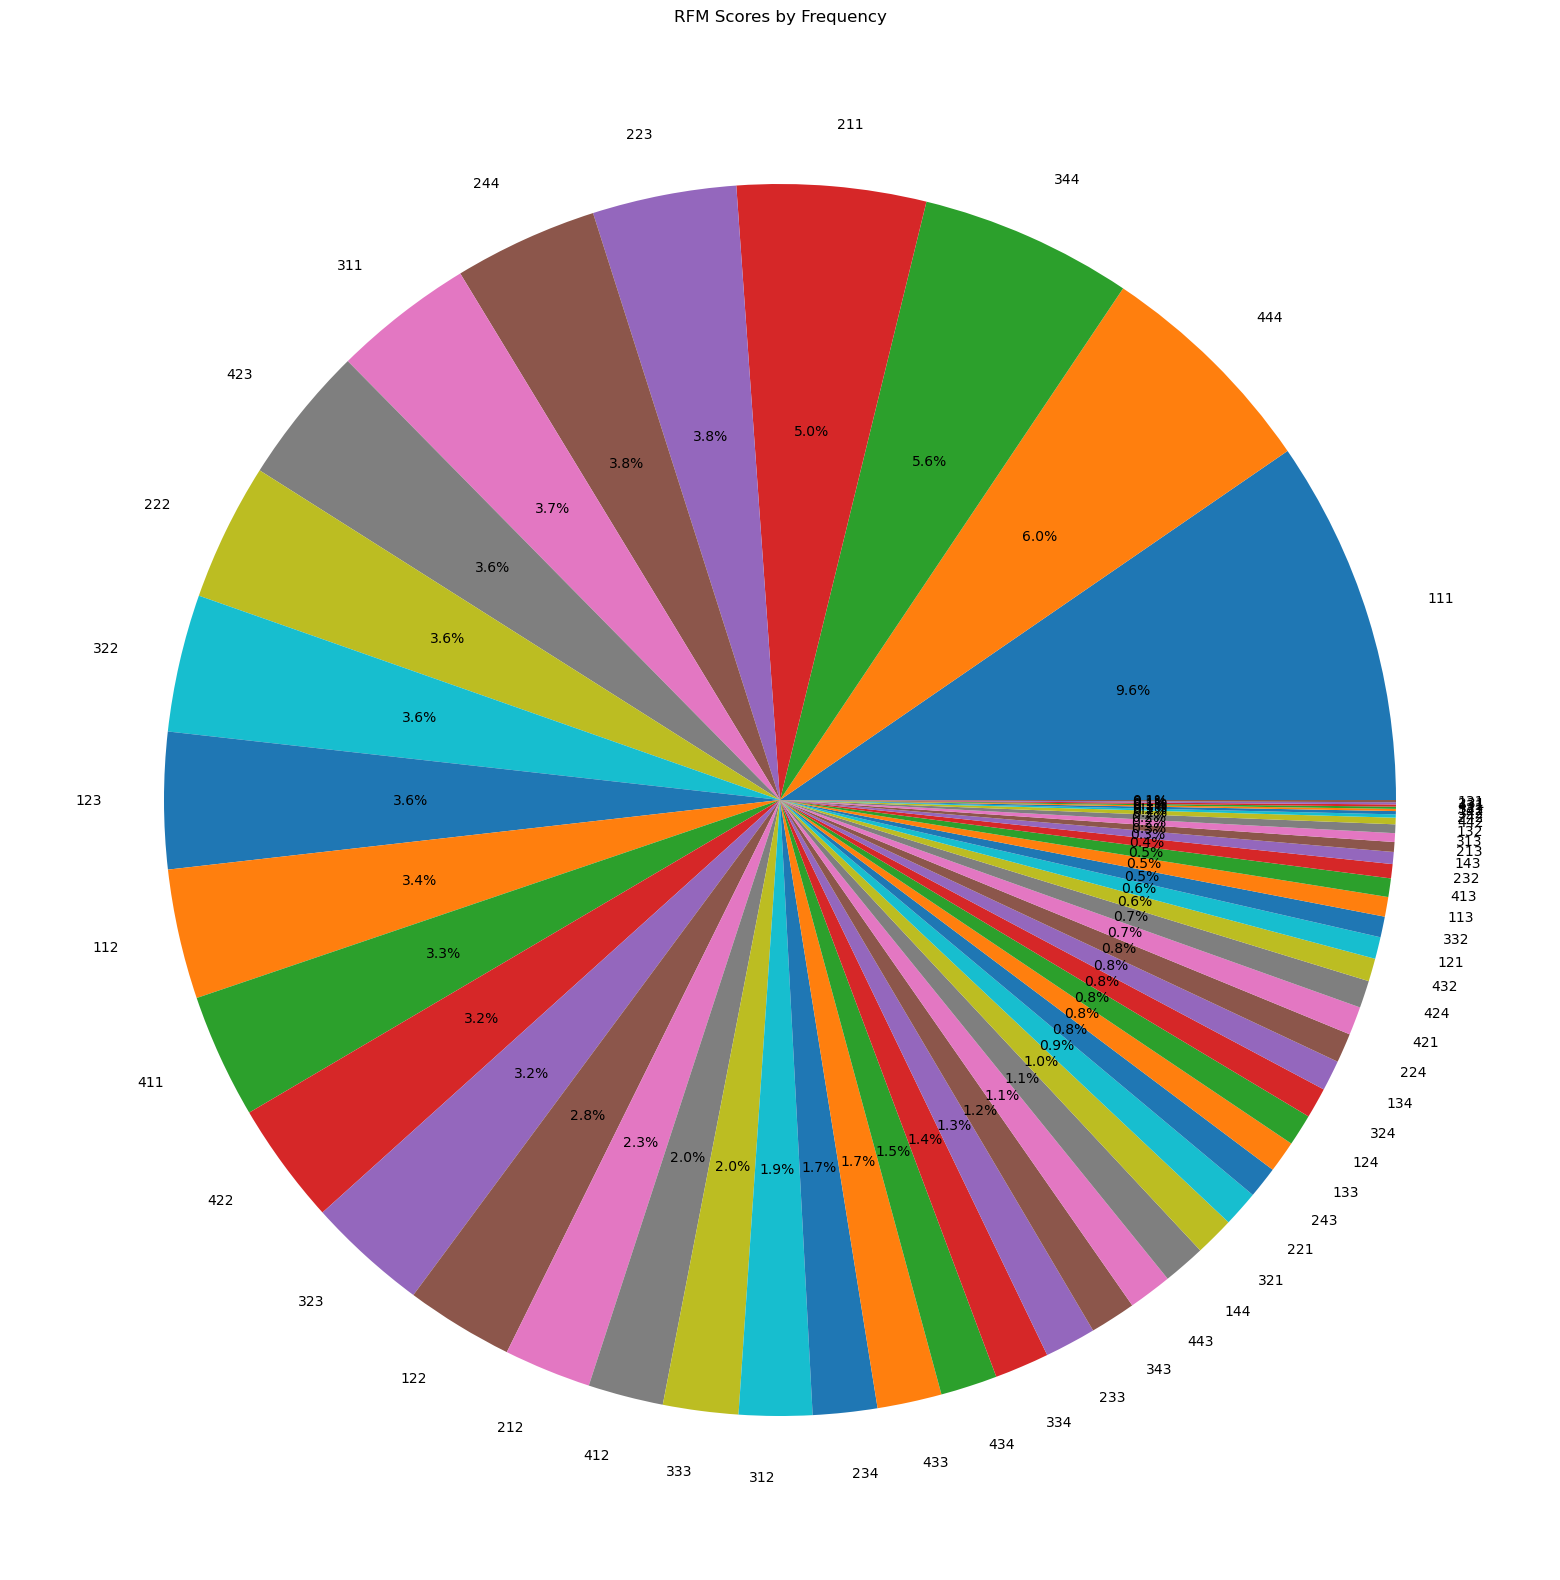

In [430]:
plt.figure(figsize=(20,20))
plt.pie(rfm_summary["Frequency"],labels=rfm_summary["RFM_Score"],autopct="%1.1f%%")
plt.title('RFM Scores by Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.pieplot()
plt.title('Top 10 RFM Scores by Frequency')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.show()

In [360]:
rfm.dtypes

customer_id      int64
Recency          int64
Frequency        int64
Monetary       float64
R_Score         object
F_Score         object
M_Score         object
RFM_Score       object
dtype: object

# 4. Data cleaning on customer dataset

In [506]:
df_customer_demographic=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",header=0, sheet_name="CustomerDemographic")
df_customer_address=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",header=1, sheet_name="CustomerAddress")

In [507]:
df_customer_demographic.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,125.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,125.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,125.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,125.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [512]:
#### Notice that there are 87 customers whose ages are 125, we decide to drop these 87 rows.
df_customer_demographic.drop(df_customer_demographic[df_customer_demographic["age"]==125].index,axis=0,inplace=True)

In [539]:
df_customer_demographic.drop(index=0,axis=0,inplace=True)

In [540]:
df_customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3912 entries, 88 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3912 non-null   int64  
 1   name                                 3912 non-null   object 
 2   gender                               3912 non-null   object 
 3   past_3_years_bike_related_purchases  3912 non-null   int64  
 4   DOB                                  3912 non-null   object 
 5   age                                  3912 non-null   float64
 6   job_title                            3415 non-null   object 
 7   job_industry_category                3256 non-null   object 
 8   wealth_segment                       3912 non-null   object 
 9   deceased_indicator                   3912 non-null   object 
 10  owns_car                             3912 non-null   object 
 11  tenure                            

In [541]:
df_customer_address["state"].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [542]:
def standardize_state(x):
    if x=="New South Wales":
        return "NSW"
    elif x=="Victoria":
        return "VIC"
    else:
        return x

In [543]:
df_customer_address["state"]=df_customer_address["state"].apply(standardize_state)

In [544]:
df_customer=pd.merge(df_customer_demographic,df_customer_address,on="customer_id")

In [545]:
df_customer=df_customer.merge(rfm[["customer_id","R_Score","F_Score","M_Score","RFM_Score"]],on="customer_id")

## 4.1 check for missing data

In [546]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3412 non-null   int64  
 1   name                                 3412 non-null   object 
 2   gender                               3412 non-null   object 
 3   past_3_years_bike_related_purchases  3412 non-null   int64  
 4   DOB                                  3412 non-null   object 
 5   age                                  3412 non-null   float64
 6   job_title                            2997 non-null   object 
 7   job_industry_category                2852 non-null   object 
 8   wealth_segment                       3412 non-null   object 
 9   deceased_indicator                   3412 non-null   object 
 10  owns_car                             3412 non-null   object 
 11  tenure                        

In [547]:
df_customer.isnull().sum()

customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
age                                      0
job_title                              415
job_industry_category                  560
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
R_Score                                  0
F_Score                                  0
M_Score                                  0
RFM_Score                                0
dtype: int64

In [548]:
df_customer.drop("DOB",axis=1,inplace=True)

In [549]:
df_customer[df_customer["gender"]=="U"].shape[0]

0

In [550]:
df_customer[df_customer["gender"]=="U"]

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,R_Score,F_Score,M_Score,RFM_Score


## 4.2 check for duplicate data

In [551]:
df_customer[df_customer.duplicated(subset=["customer_id"],keep=False)]

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,R_Score,F_Score,M_Score,RFM_Score


# 4.3 some basic EDA on customer dataset 

In [552]:
df_customer.columns

Index(['customer_id', 'name', 'gender', 'past_3_years_bike_related_purchases',
       'age', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Score'],
      dtype='object')

In [553]:
categorical_features=[feature for feature in df_customer.columns if df_customer[feature].dtype=="O"]

In [554]:
categorical_features

['name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state',
 'country',
 'R_Score',
 'F_Score',
 'M_Score',
 'RFM_Score']

In [555]:
to_remove = ["name", "address", "RFM_Score","job_title", 'deceased_indicator']
categorical_features = [item for item in categorical_features if item not in to_remove]

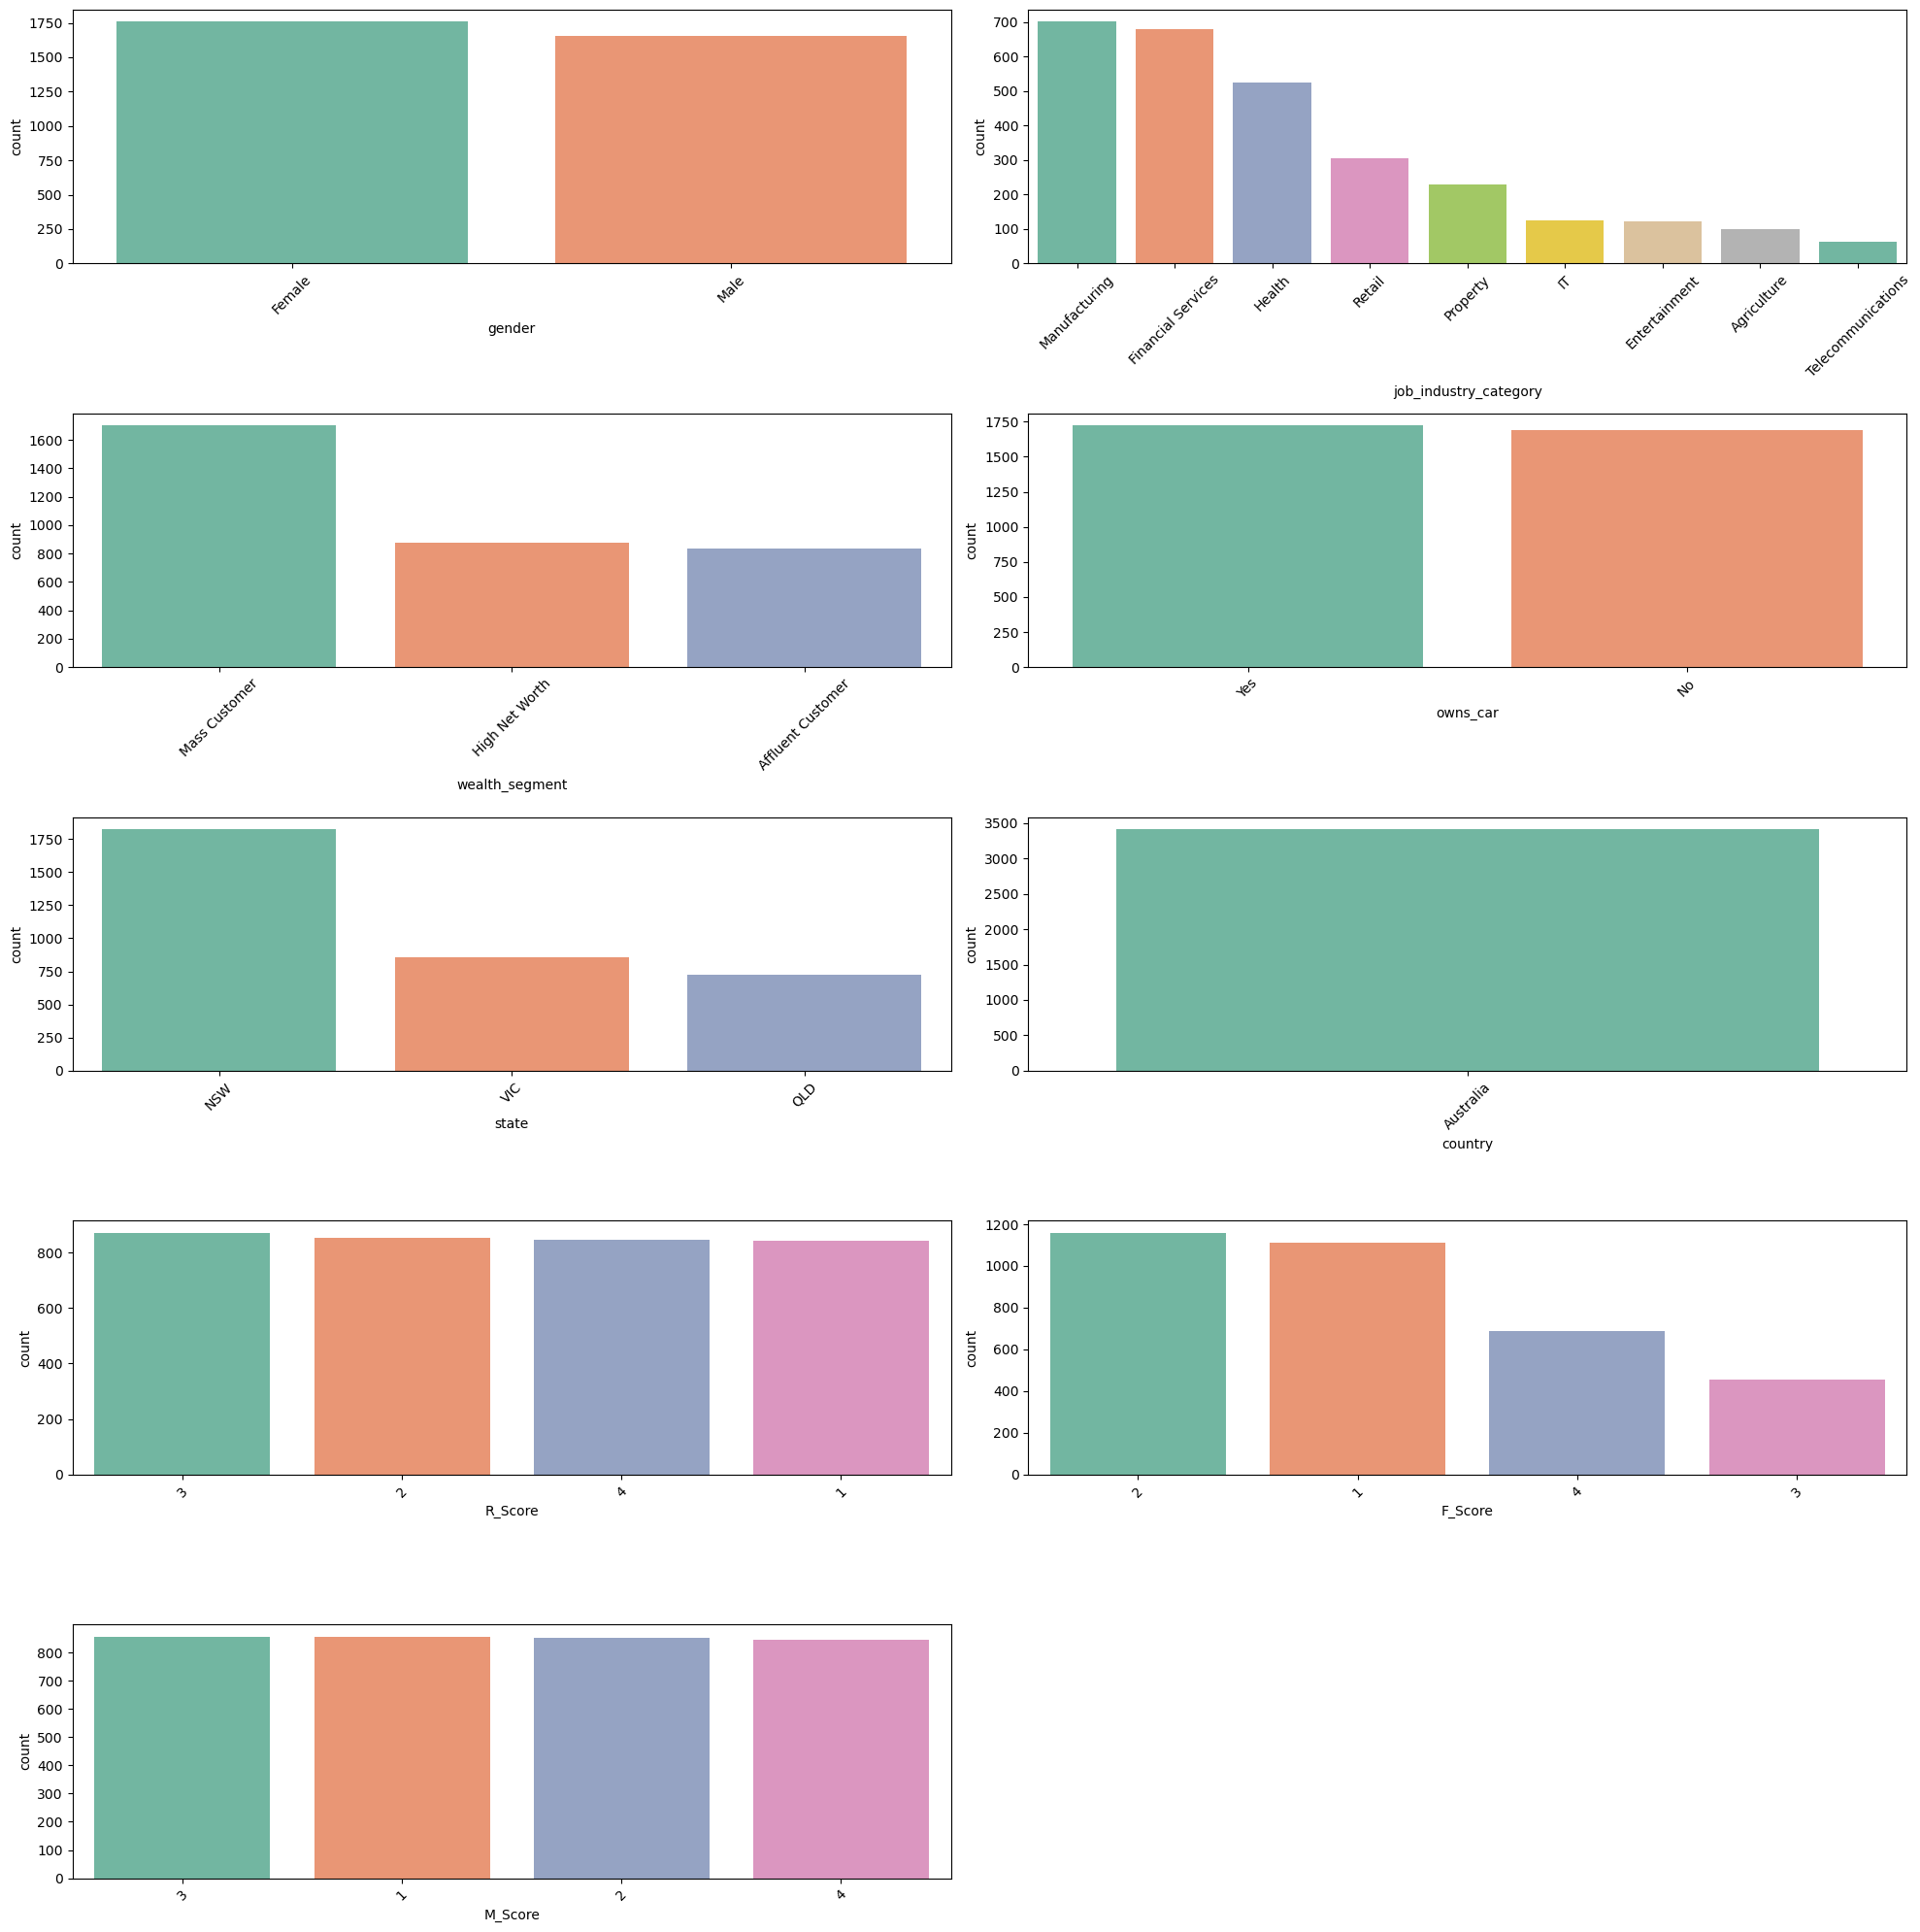

In [556]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(categorical_features):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df_customer[feature],palette="Set2",order=df_customer[feature].value_counts().index)
    plt.xlabel(feature)
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [557]:
numeric_features=[feature for feature in df_customer.columns if df_customer[feature].dtype!="O"]
numeric_features

['customer_id',
 'past_3_years_bike_related_purchases',
 'age',
 'tenure',
 'postcode',
 'property_valuation']

In [558]:
to_remove2=['customer_id','postcode']
numeric_features=[item for item in numeric_features if item not in to_remove2]

In [559]:
numeric_features

['past_3_years_bike_related_purchases', 'age', 'tenure', 'property_valuation']

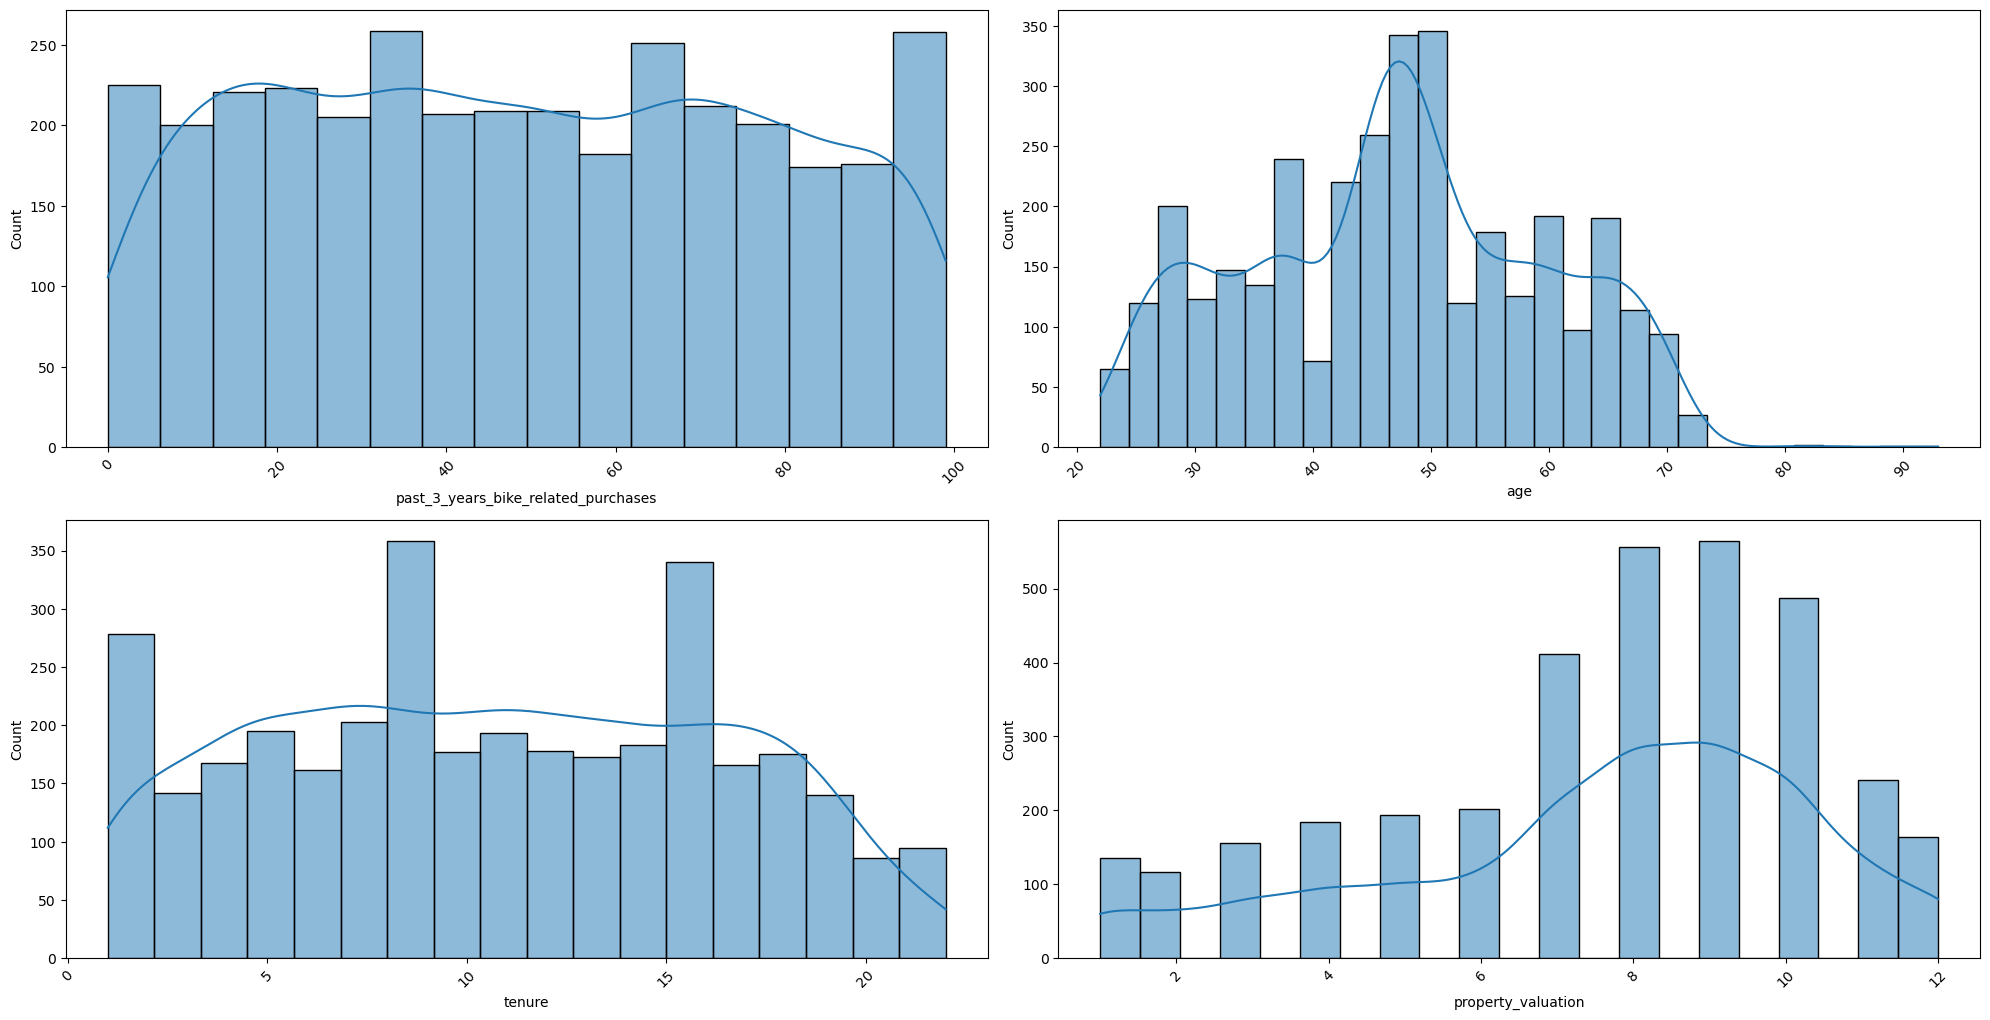

In [600]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(numeric_features):
    plt.subplot(4,2,i+1)
    sns.histplot(df_customer[feature],fill=True,kde=True)
    plt.xlabel(feature)
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# 5. More EDA Analysis 

## 5.1 RFM analysis by gender, age and job_industry_category

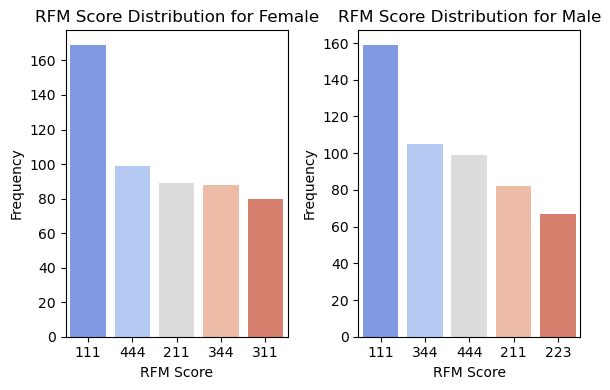

In [562]:
# Group by gender and RFM_Score, count the occurrences, and reset index
df_temp = df_customer.groupby(["gender", "RFM_Score"])["RFM_Score"].count().reset_index(name="count")

# Sort and select top 5 RFM scores for each gender
df_temp = df_temp.sort_values(["gender", "count"], ascending=[True, False])
df_top5_rfm = df_temp.groupby("gender").head(5)

# Visualization for each gender
gender=["Female","Male"]
plt.figure(figsize=(6, 4))
for i,gender in enumerate(gender):
    plt.subplot(1,2,i+1)
    data_to_plot = df_top5_rfm[df_top5_rfm['gender'] == gender]
    sns.barplot(x='RFM_Score', y='count', data=data_to_plot, palette='coolwarm')
    plt.title(f'RFM Score Distribution for {gender}')
    plt.xlabel('RFM Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Insight**: It's evident that the frequency of the '111' score, indicating the lowest level of customer engagement, dominates among both female and male customers. It also appear that there is a trend where male customers might be slightly more engaged in terms of frequency and monetary spending compared to female customers. 

In [564]:
# add age_group segment
bins = [0, 17, 24, 34, 49, 64, 100]
labels = ['17 and under', '18-24', '25-34', '35-49', '50-64', '65 and above']
df_customer["age_group"]=pd.cut(df_customer["age"],bins=bins,labels=labels)

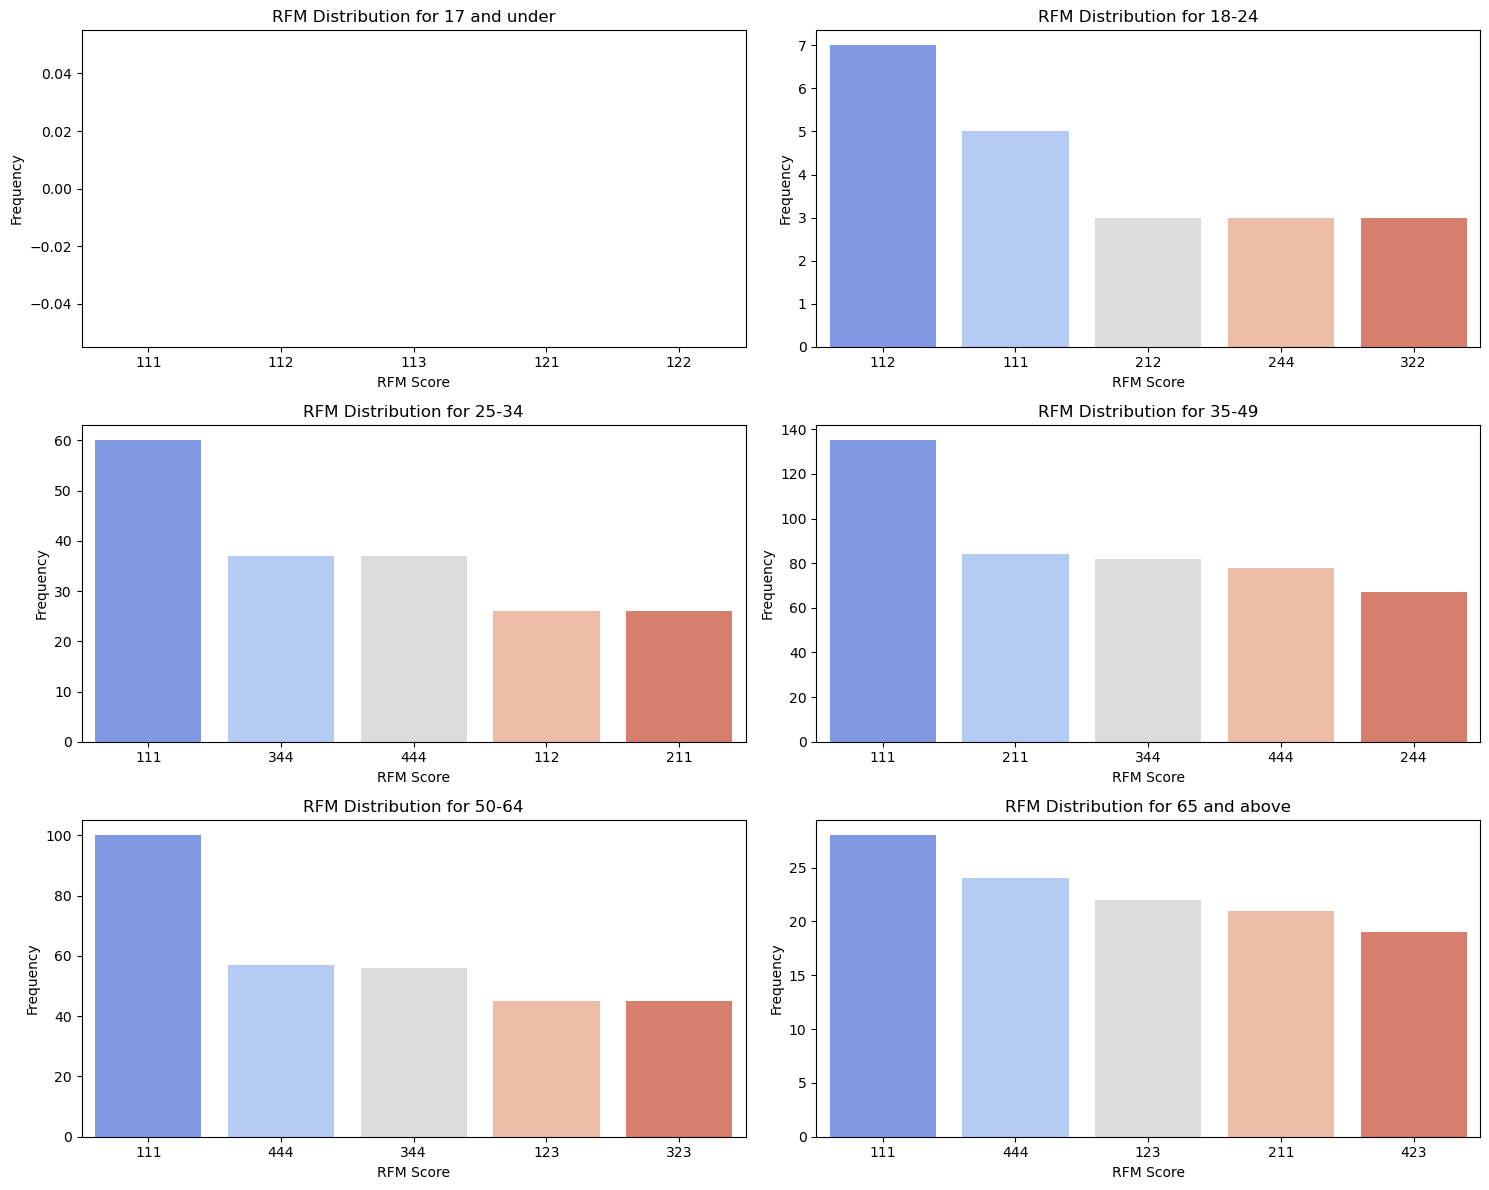

In [595]:
df_temp=df_customer.groupby(["age_group","RFM_Score"])["RFM_Score"].count().reset_index(name="count")
df_temp=df_temp.sort_values(["age_group","count"],ascending=[True,False])
df_top5_rfm=df_temp.groupby("age_group").head(5)
age_group=df_temp["age_group"].unique()

# visulization

plt.figure(figsize=(15,12))
for index, feature in enumerate(age_group):
    plt.subplot(3,2,index+1)
    data_to_plot=df_top5_rfm[df_top5_rfm["age_group"]==feature]
    sns.barplot(x="RFM_Score",y="count",data=data_to_plot,palette="coolwarm")
    plt.title(f"RFM Distribution for {feature}")
    plt.xlabel("RFM Score")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Insight**: The age groups of 25-34, 35-49, and 50-64 are key demographics in terms of purchasing power, as indicated by the higher frequency of relatively high RFM scores (344 and 444). Among them, the 35-49 age group shows a notable tendency towards the highest RFM scores, suggesting they purchase more frequently and spend more per transaction compared to other age groups.

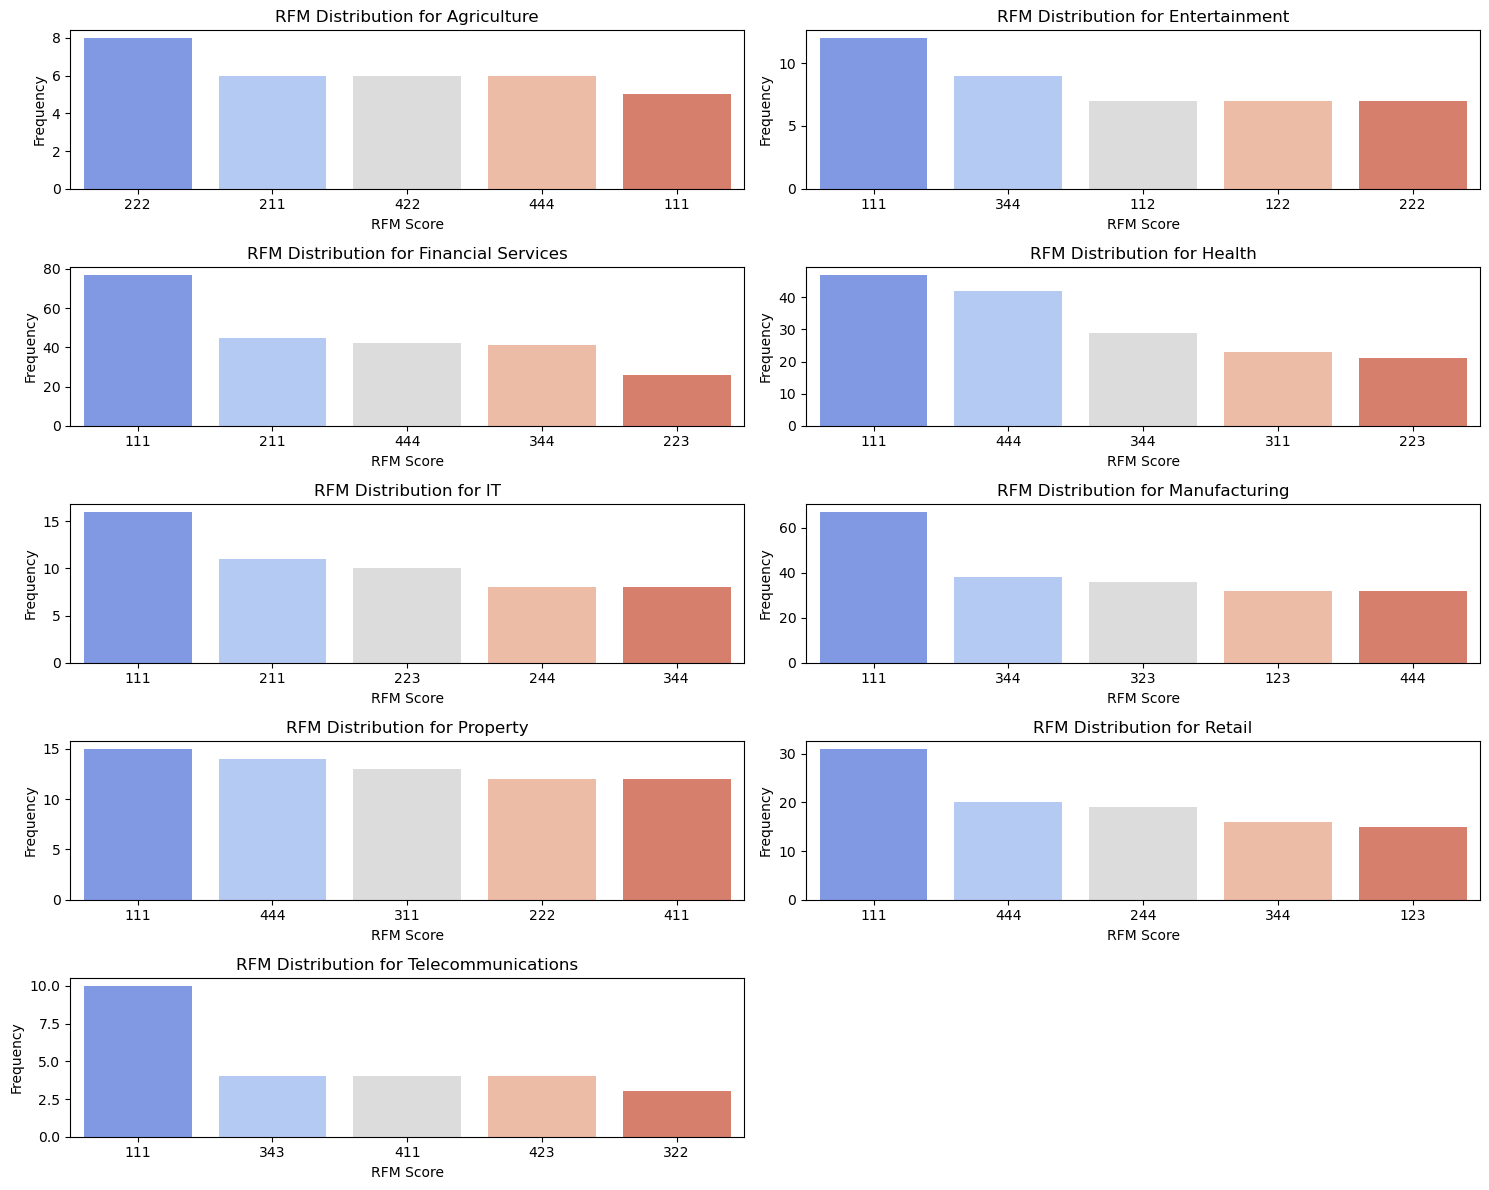

In [599]:
df_temp=df_customer.groupby(["job_industry_category","RFM_Score"])["RFM_Score"].count().reset_index(name="count")
df_temp=df_temp.sort_values(["job_industry_category","count"],ascending=[True,False])
df_top5_rfm=df_temp.groupby("job_industry_category").head(5)
job_industry_category=df_temp["job_industry_category"].unique()

# visulization

plt.figure(figsize=(15,12))
for index, feature in enumerate(job_industry_category):
    plt.subplot(5,2,index+1)
    data_to_plot=df_top5_rfm[df_top5_rfm["job_industry_category"]==feature]
    sns.barplot(x="RFM_Score",y="count",data=data_to_plot,palette="coolwarm")
    plt.title(f"RFM Distribution for {feature}")
    plt.xlabel("RFM Score")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Insight**:  It appears that customers working in the financial, health, and manufacturing industries tend to have higher frequency in achieving higher RFM scores.

## 5.2 Brand Sales Performance Analysis:
Identifying which brands and product lines are performing best in terms of sales.

In [601]:
df_Transaction.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transact_month,cohort_month,cohort_index,price_cost_margin
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2017-02-01,2017-02-01,1,17.87


In [608]:
df_Transaction.groupby("brand")["list_price"].sum().reset_index(name="brand_sales").sort_values("brand_sales",ascending=False)

,brand,brand_sales
3,Solex,4496577.63
5,WeareA2B,4163083.61
0,Giant Bicycles,4091668.66
4,Trek Bicycles,3539512.36
2,OHM Cycles,2993420.35
1,Norco Bicycles,2657419.13


In [609]:
df_Transaction.groupby(["product_line"])["list_price"].sum().reset_index(name="product_line_sales").sort_values("product_line_sales",ascending=False)

,product_line,product_line_sales
2,Standard,15634943.96
1,Road,4041528.14
3,Touring,1999338.92
0,Mountain,265870.72


**Insight**: In terms of brands, Solex leads with the highest total sales, followed by WeareA2B and Giant Bicycles. Regarding product lines, Standard is the most common category, followed by Road. Touring and Mountain categories exhibit less popularity.

In [615]:
sales_performance = df_Transaction.groupby(['brand', 'product_line'])['list_price'].sum().unstack().fillna(0)

In [616]:
sales_performance.head()

product_line,Mountain,Road,Standard,Touring
brand,,,,
Giant Bicycles,0.00,550683.50,3205544.53,335440.63
Norco Bicycles,137726.00,754687.57,1765005.56,0.00
OHM Cycles,0.00,753261.13,1994426.19,245733.03
Solex,0.00,710958.22,3352159.89,433459.52
Trek Bicycles,128144.72,1087811.26,2323556.38,0.00


In [ ]:
# Brand Sales Performance by Product Line visulization

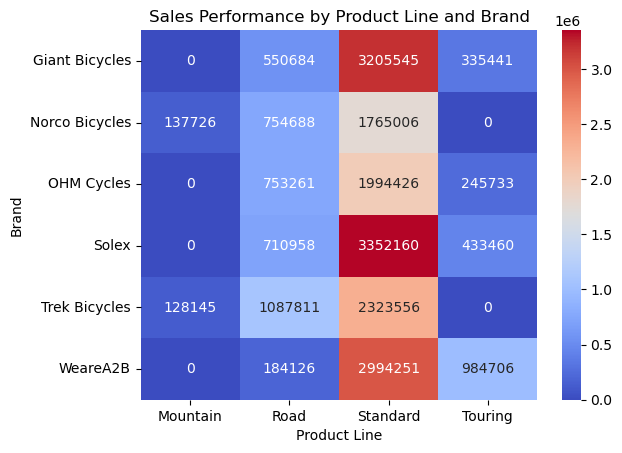

In [618]:
sns.heatmap(sales_performance, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Sales Performance by Product Line and Brand')
plt.xlabel('Product Line')
plt.ylabel('Brand')
plt.show()

**Insight**: The heatmap analysis aligns with the table above, indicating he standard products from the brands "Solex", "Giant Bicycles", and "WeareA2B" consistently achieve the top three sales figures.

## 5.3. Geographic Purchase Patterns Analysis: 
how customer buying patterns differ by geographic location such as state

In [620]:
df_combined=df_Transaction.merge(df_customer,on="customer_id")

In [621]:
df_combined.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,address,postcode,state,country,property_valuation,R_Score,F_Score,M_Score,RFM_Score,age_group
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,984 Hoepker Court,3064,VIC,Australia,6,2,1,1,211,65 and above
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,4 Shopko Circle,2196,NSW,Australia,5,3,3,3,333,35-49
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,...,586 Miller Parkway,2835,NSW,Australia,1,2,2,4,224,35-49
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,...,1617 Harper Parkway,2096,NSW,Australia,10,1,3,3,133,50-64
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,...,0601 Stephen Place,2292,NSW,Australia,7,2,4,4,244,25-34


In [643]:
df_combined.groupby("state")['list_price'].sum().reset_index(name="total_sales")

,state,total_sales
0,NSW,11367832.25
1,QLD,4615569.03
2,VIC,5400912.53


In [634]:
df_geo_brand_sales=df_combined.groupby(["state","brand"])['list_price'].sum().reset_index(name="total_sales").sort_values(["state","total_sales"],ascending=[True,False])

In [644]:
df_geo_brand_sales

,state,brand,total_sales
3,NSW,Solex,2337969.59
5,NSW,WeareA2B,2134536.06
0,NSW,Giant Bicycles,2078326.22
4,NSW,Trek Bicycles,1836616.76
2,NSW,OHM Cycles,1580789.37
1,NSW,Norco Bicycles,1399594.25
9,QLD,Solex,939545.89
11,QLD,WeareA2B,874579.98
6,QLD,Giant Bicycles,871034.83
10,QLD,Trek Bicycles,712890.24


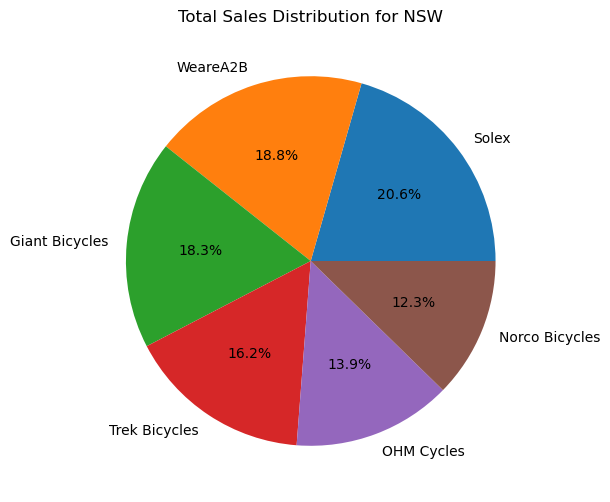

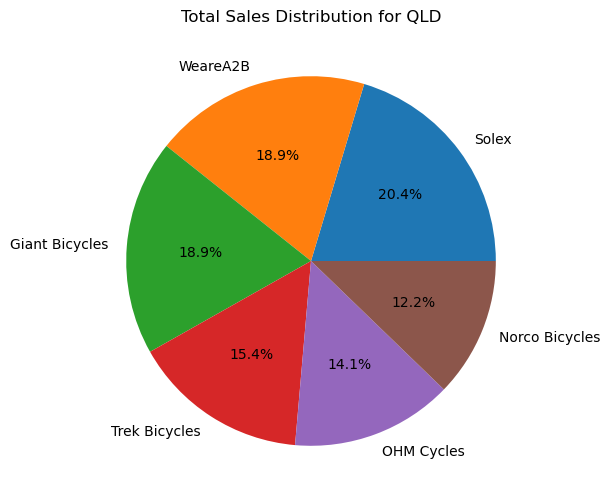

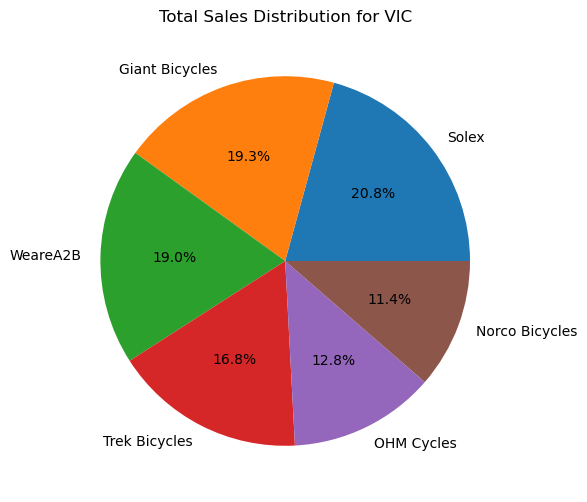

In [642]:
# visulization
states=["NSW","QLD","VIC"]
for state in states:
    data_to_plot = df_geo_brand_sales[df_geo_brand_sales["state"] == state]
    
    # Creating the pie chart using the data filtered for the current state
    plt.figure(figsize=(8, 6))  # Setting the figure size
    plt.pie(data_to_plot["total_sales"], labels=data_to_plot["brand"], autopct='%1.1f%%')
    plt.title(f'Total Sales Distribution for {state}')
    plt.show()

**Insight**: We observe that New South Wales (NSW) leads in sales, followed by Victoria (VIC) as the second highest, and Queensland (QLD) ranks last. In each state, the top three brands in terms of sales are Solex, Giant Bicycles, and WeareA2B. Specifically, in NSW, the sales distribution among these top brands is as follows: Solex at 20.6%, WeareA2B at 18.8%, and Giant Bicycles at 18.3%. In QLD, the leading brands are fairly close, with Solex at 20.4%, followed by WeareA2B and Giant Bicycles, both at 18.9%. In VIC, the breakdown is Solex at 20.8%, Giant Bicycles at 19.3%, and WeareA2B at 19.0%.